# IYPT: Guitar String
Problem 11 of the 34th International Young Physicists' Tournament

## Analytical solution

using `sympy` library;

attempts to algorithmically find analytical solution for given parameters

In [15]:
from sympy import *

# global time symbol
t = symbols('t')

# accepts parameters (optimal):
def analytical(
    beta    = symbols('beta'),
    gamma   = symbols('gamma'),
    omega_0 = symbols('omega_0'),
    m       = symbols('m'),
    F       = symbols('F', cls=Function),
    ):
    
    # second newton's law elements
    y        = symbols('y', cls=Function)
    ydprime  = y(t).diff(t, 2)
    damping  = 2 * beta * omega_0 * y(t).diff(t)
    system   = omega_0**2 * y(t) * (1 + gamma * y(t)**2)
    driving  = F(t) if callable(F) else F
    
    # putting it together
    lefthand = ydprime + damping + system
    ritehand = driving / m
    eq = Eq(lefthand, ritehand)
    print('input:')
    display(eq)
    
    # attempt to solve
    try: 
        return dsolve(eq)
    except NotImplementedError:
        return None

# call with given parameters
F_m, omega, phi = symbols('F_m omega phi')
sol = analytical(
    gamma = 0,
    F = F_m * sin(omega * t + phi)
)

print('solution:')
display(sol)

input:


Eq(2*beta*omega_0*Derivative(y(t), t) + omega_0**2*y(t) + Derivative(y(t), (t, 2)), F_m*sin(omega*t + phi)/m)

solution:


Eq(y(t), C1*exp(omega_0*t*(-beta - sqrt(beta**2 - 1))) + C2*exp(omega_0*t*(-beta + sqrt(beta**2 - 1))) - 2*F_m*beta*omega*omega_0*cos(omega*t + phi)/(m*(4*beta**2*omega**2*omega_0**2 + omega**4 - 2*omega**2*omega_0**2 + omega_0**4)) - F_m*omega**2*sin(omega*t + phi)/(m*(4*beta**2*omega**2*omega_0**2 + omega**4 - 2*omega**2*omega_0**2 + omega_0**4)) + F_m*omega_0**2*sin(omega*t + phi)/(m*(4*beta**2*omega**2*omega_0**2 + omega**4 - 2*omega**2*omega_0**2 + omega_0**4)))

## Numerical solution

calculating performed with `scipy`, `numpy` libraries,

plotting via `matplotlib` library;

displays approximate numerical solution for given model

No handles with labels found to put in legend.


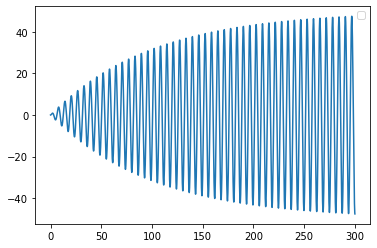

In [16]:
from numpy import *
from scipy.integrate import odeint 
from matplotlib import pyplot as plt

# formula parameters required;
# notation - as above so below
# duration - experiment duration
# sampling - samples per vibration
def numerical(
    beta,
    gamma,
    omega_0,
    m,
    F,
    y_0 = 0,
    duration = 100,
    sampling = 100,
    label = None,
    rtol = None,
    atol = None,
    ):

    # numerical model
    # y is list of the displacement function and its derivatives
    # t is respective time coordinate
    def model(y, t):
        system  = omega_0**2 * y[0] * (1 + gamma * y[0]**2)
        damping = 2 * beta * omega_0 * y[1]
        driving = F(t) / m
        return y[1], -system - damping + driving

    # initial conditions (x,y)
    initial = (0, y_0)

    # prepare samples
    total = duration * (omega_0 / (2 * pi)) * sampling
    space = linspace(0, duration, int(total))
    
    # run model
    sols  = odeint(model, initial, space, atol=atol, rtol=rtol)
    sol   = sols[0:,1]
    plt.plot(space, sol, label=label)
    return plt.legend(loc='best')

# define driving force
omega = 1
F_m   = 1
phi   = 0
F     = lambda t: F_m * sin(omega * t + phi)

# call with given parameters
sol = numerical(
    beta     = 1 * 10**-2,
    omega_0  = 1,
    gamma    = 0,
    m        = 1,
    F        = F,
    duration = 300,
    atol=10**-14,
    rtol=10**-13,
)

## Duffing oscillator

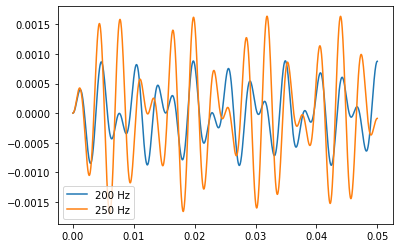

In [17]:
display(numerical(
    beta     = 1. * 10**-3,
    omega_0  = 330 * 2 * pi,
    gamma    = .25 * 10**4,
    m        = 1.,
    F        = lambda t: F_m * sin((200*2*pi) * t + phi),
    sampling = 100,
    duration = .05,
    label    = '200 Hz'
))


display(numerical(
    beta     = 1. * 10**-3,
    omega_0  = 330 * 2 * pi,
    gamma    = .25 * 10**4,
    m        = 1.,
    F        = lambda t: F_m * sin((250*2*pi) * t + phi),
    sampling = 100,
    duration = .05,
    label    = '250 Hz',
))

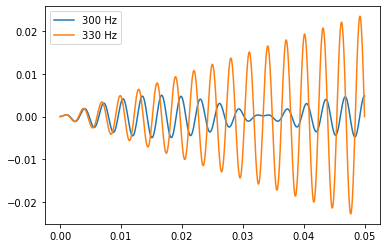

In [18]:
display(numerical(
    beta     = 1. * 10**-3,
    omega_0  = 330 * 2 * pi,
    gamma    = .25 * 10**4,
    m        = 1.,
    F        = lambda t: F_m * sin((300*2*pi) * t + phi),
    sampling = 100,
    duration = .05,
    label    = '300 Hz'
))

display(numerical(
    beta     = 1. * 10**-3,
    omega_0  = 330 * 2 * pi,
    gamma    = .25 * 10**4,
    m        = 1.,
    F        = lambda t: F_m * sin((330*2*pi) * t + phi),
    sampling = 100,
    duration = .05,
    label    = '330 Hz'
))